In [1]:
#La extensión autoreload permite que el código Python que hayas modificado en módulos externos se recargue 
#automáticamente sin que tengas que reiniciar el kernel o volver a cargar manualmente los módulos.
%load_ext autoreload
#Este comando configura autoreload en el modo 2, que significa que todos los módulos que importas serán 
#recargados automáticamente en cada ejecución de una celda.
%autoreload 2

In [4]:
from pathlib import Path
from pyrosm import OSM

import mesa
import mesa_geo as mg
import matplotlib.pyplot as plt
import geopandas as gpd

from aves.data import eod
from zorzim.model.model import ZorZim
from zorzim.model.demand_model import EODDemandGenerationModel
from zorzim.visualization.server import (
    agent_draw,
    clock_element,
    status_chart,
)

ZORZIM_ROOT = Path("..")

OSM_PATH = ZORZIM_ROOT / "data" / "external" / "OSM"

#EOD_PATH = ZORZIM_ROOT / "aves" / "data" / "external" / "EOD_STGO"

#Región metropolitana
#PBF_FILENAME = "chile-rm-latest.osm.pbf"
#Peñalolén
#PBF_FILENAME = "penalolen.osm.pbf"
#Valparaíso
PBF_FILENAME = "valparaiso.osm.pbf"

# Imprime las rutas completas
print(f"ZORZIM_ROOT: {ZORZIM_ROOT.resolve()}")
print(f"OSM_PATH: {OSM_PATH.resolve()}")
#print(f"EOD_PATH: {EOD_PATH.resolve()}")
print(f"PBF File: {OSM_PATH / PBF_FILENAME}")

ZORZIM_ROOT: /home/paula/zorzim
OSM_PATH: /home/paula/zorzim/data/external/OSM
PBF File: ../data/external/OSM/valparaiso.osm.pbf


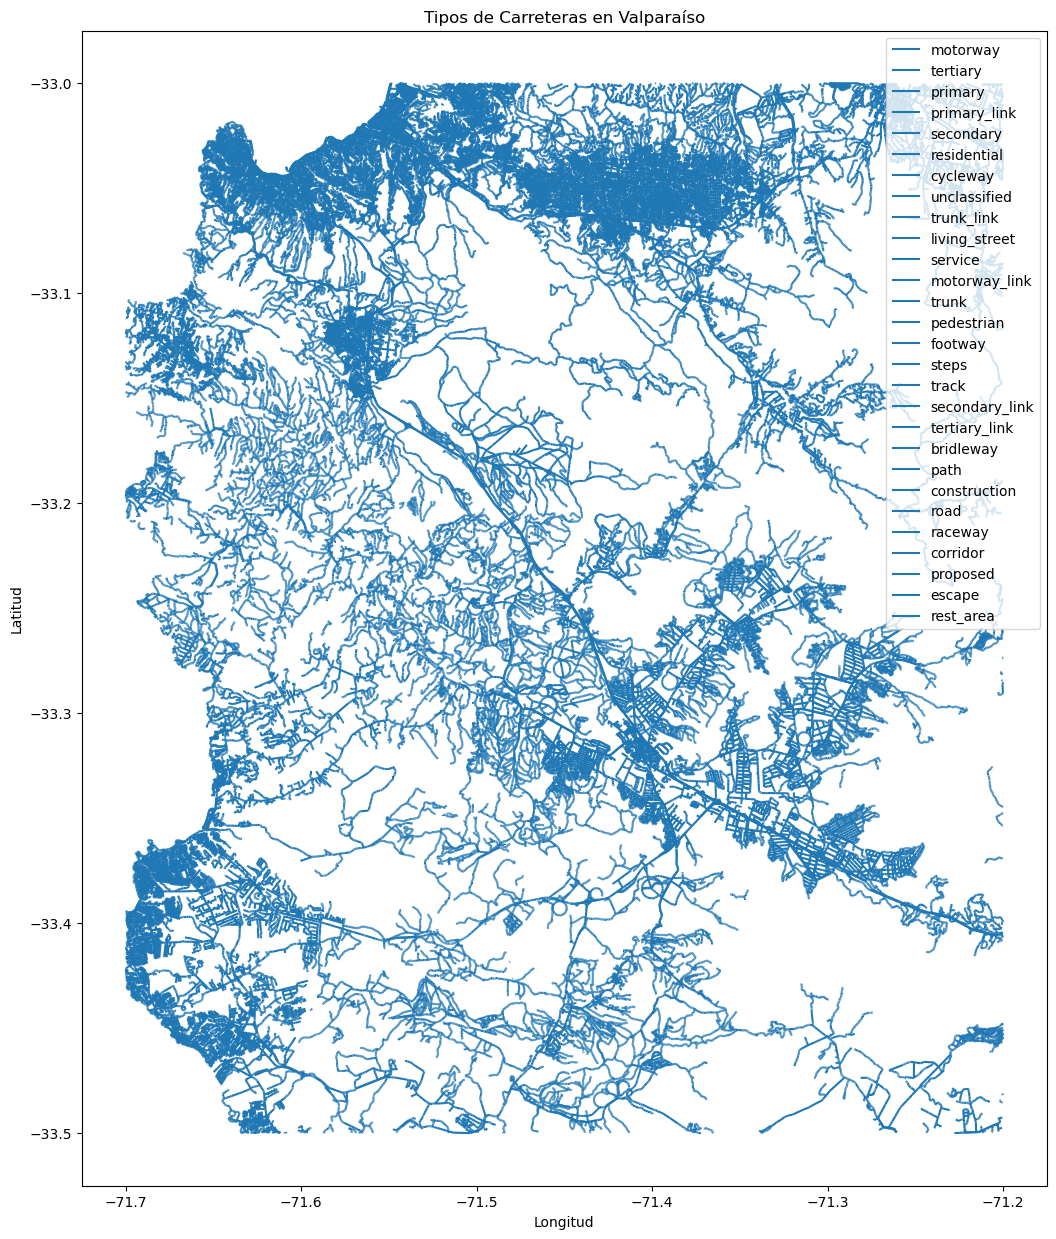

In [3]:
#NO CARGAR VALPARAISO GRANDE 
osm_file = "/home/paula/zorzim/data/external/OSM/valparaiso.osm.pbf"
osm = OSM(osm_file)

# Obtener los datos de la red de carreteras
network_data = osm.get_network(network_type="all")  
gdf = gpd.GeoDataFrame(network_data, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Graficar los tipos de carretera por separado
for highway_type in gdf['highway'].unique():
    subset = gdf[gdf['highway'] == highway_type]
    subset.plot(ax=ax, label=highway_type)

plt.legend()
plt.title('Tipos de Carreteras en Valparaíso')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [3]:
from pyrosm import OSM
import matplotlib.pyplot as plt

# Ruta del archivo OSM
osm_path = "/home/paula/zorzin/data/external/OSM/valparaiso.osm.pbf"

# Carga los datos usando pyrosm
osm = OSM(osm_path)

# Ejemplo: Obtener información de carreteras
roads = osm.get_data_by_custom_criteria(
    custom_filter={"highway": True},
    filter_type="keep"
)

# Visualizar las carreteras
roads.plot(figsize=(10, 10), alpha=0.7, edgecolor="black")
plt.title("Carreteras del archivo OSM")
plt.show()


ValueError: File does not exist: Found: /home/paula/zorzin/data/external/OSM/valparaiso.osm.pbf

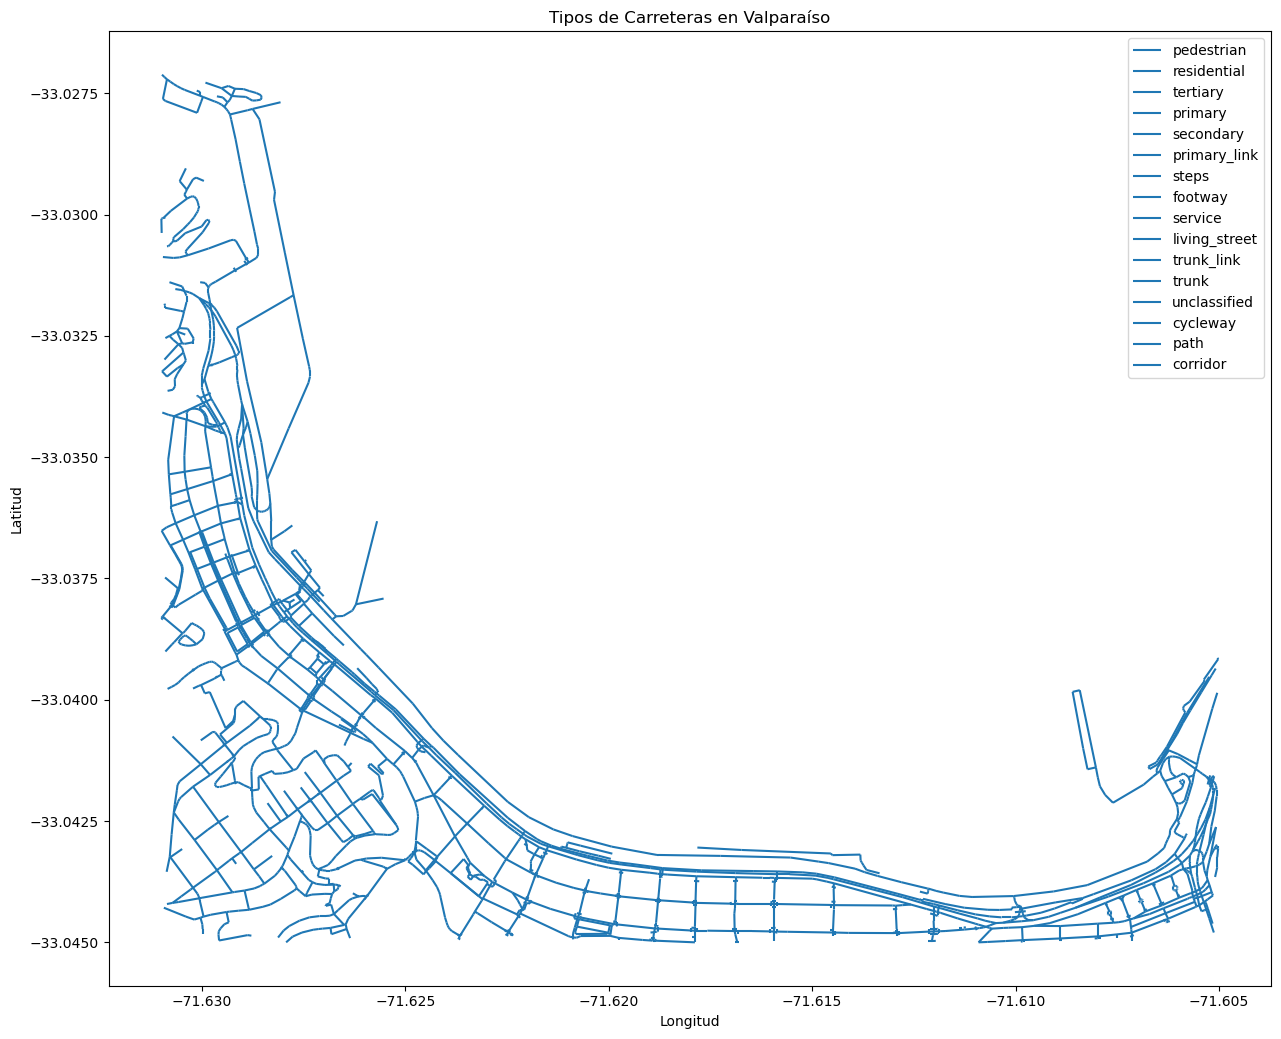

In [3]:
osm_file = "/home/paula/zorzim/data/external/OSM/valparaiso_pequeno.osm.pbf"
osm = OSM(osm_file)

# Obtener los datos de la red de carreteras
network_data = osm.get_network(network_type="all")  
gdf = gpd.GeoDataFrame(network_data, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Graficar los tipos de carretera por separado
for highway_type in gdf['highway'].unique():
    subset = gdf[gdf['highway'] == highway_type]
    subset.plot(ax=ax, label=highway_type)

plt.legend()
plt.title('Tipos de Carreteras en Valparaíso')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

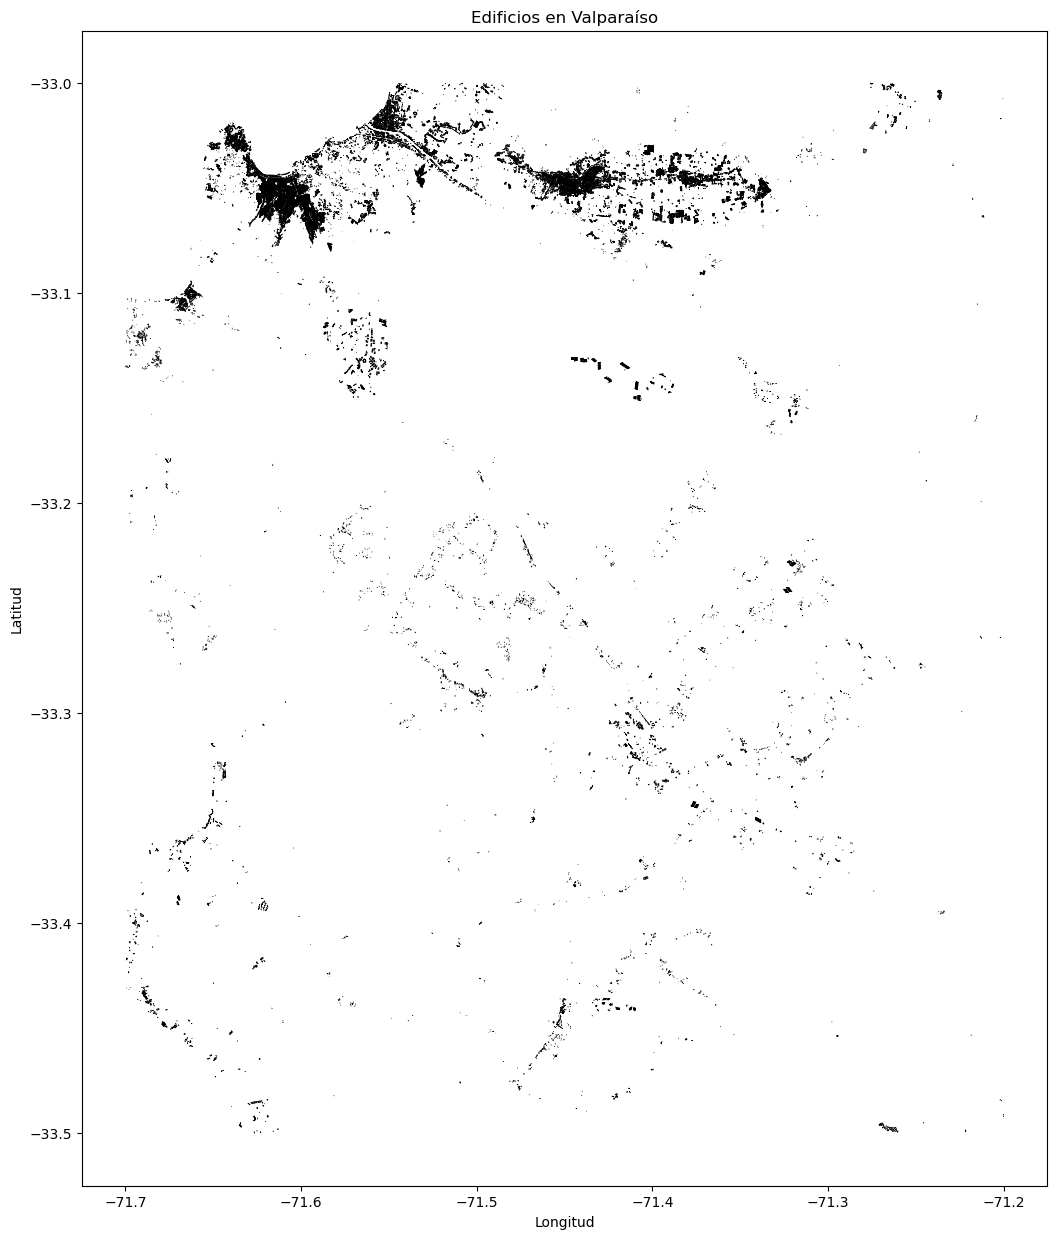

In [4]:
#NO CARGAR VALPARISO GRANDE
buildings = osm.get_buildings()

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
buildings.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)

plt.title('Edificios en Valparaíso')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

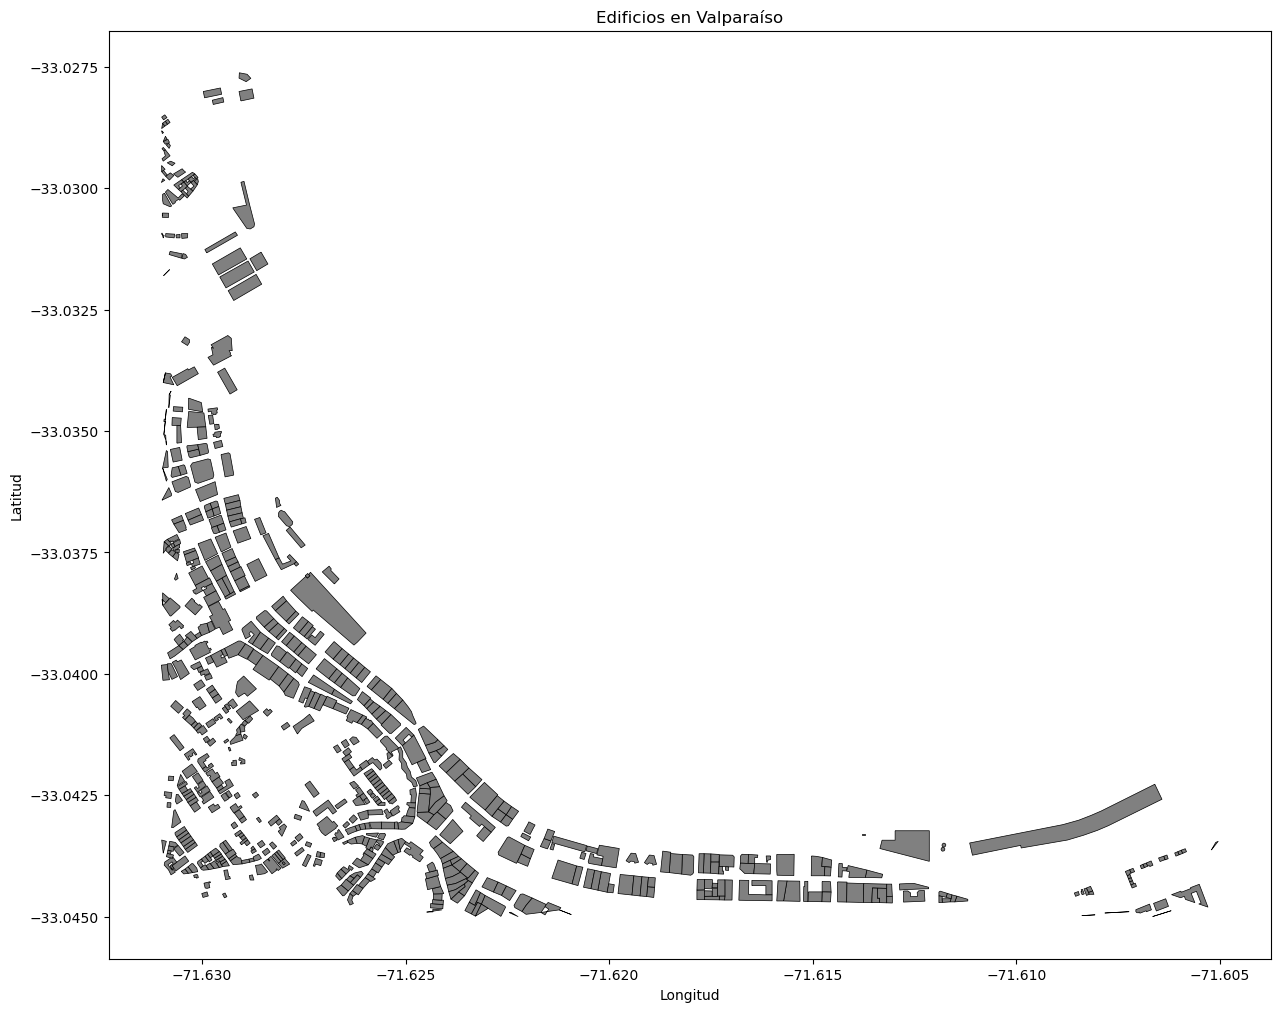

In [4]:
buildings = osm.get_buildings()

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
buildings.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)

plt.title('Edificios en Valparaíso')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [5]:
# Amacenaje de las coordenadas de los edificios 
building_coords = []

# Recorrer cada edificio en el GeoDataFrame
for _, row in buildings.iterrows():
    geometry = row['geometry']
    
    # Verificar si la geometría es un polígono o un multipolígono
    if geometry.geom_type == 'Polygon':
        # Extraer las coordenadas de los polígonos
        coords = list(geometry.exterior.coords)
        building_coords.append(coords)
    elif geometry.geom_type == 'MultiPolygon':
        # Si es un multipolígono, extraer las coordenadas de cada polígono usando .geoms
        for polygon in geometry.geoms:
            coords = list(polygon.exterior.coords)
            building_coords.append(coords)

# Mostrar las primeras coordenadas para verificar
print(building_coords[:5])  # Muestra las coordenadas de los primeros 5 edificios


[[(-71.62992858886719, -33.0357666015625), (-71.62998962402344, -33.03574752807617), (-71.63004302978516, -33.0357666015625), (-71.63006591796875, -33.03581237792969), (-71.63005065917969, -33.03585433959961), (-71.62999725341797, -33.03588104248047), (-71.62994384765625, -33.0358772277832), (-71.62991333007812, -33.03584671020508), (-71.62991333007812, -33.03581237792969), (-71.62992858886719, -33.0357666015625)], [(-71.62979125976562, -33.03559112548828), (-71.62985229492188, -33.03557586669922), (-71.63023376464844, -33.03565979003906), (-71.63027954101562, -33.03571701049805), (-71.63017272949219, -33.03605270385742), (-71.63009643554688, -33.03607940673828), (-71.62973022460938, -33.035972595214844), (-71.62970733642578, -33.03590774536133), (-71.62979125976562, -33.03559112548828)], [(-71.62953186035156, -33.039512634277344), (-71.62947845458984, -33.03960037231445), (-71.6295394897461, -33.03962707519531), (-71.6295166015625, -33.039676666259766), (-71.62944793701172, -33.039646

In [18]:
# NO CORRER DE NUEVO
# Prueba Modelo con Mapa de Valparaiso (Puntos de inicio aleatorios dentro del mapa)
from zorzim.model.demand_model import RandomValparaisoDemandModel
from pyrosm import OSM

# Ruta al archivo reducido de Valparaíso
osm_file_path = "/home/paula/zorzim/data/external/OSM/valparaiso_pequeno.osm.pbf"

# Crear el modelo de demanda aleatoria para Valparaíso
demand_generation_model = RandomValparaisoDemandModel(osm_file_path=osm_file_path, num_trips=3)

# Inicializar el modelo ZorZim con el nuevo modelo de demanda
model = ZorZim(
    osm_object=OSM(osm_file_path),
    data_crs="epsg:4326",
    model_crs="epsg:5361",
    num_commuters=10,  # Ajusta el número de agentes según sea necesario
    commuter_speed=1.0,
    demand_generation_model=demand_generation_model
)


Iniciando la carga de la red de carreteras...
Tiempo para cargar modal_split_model: 0.40 segundos
Tiempo para cargar walkway: 0.11 segundos
Tiempo para cargar driveway: 0.07 segundos
Carga de red de carreteras completada.
Iniciando la creación de agentes (commuters)...
Agente 1/10 creado con posición POINT (-71.6192817723364 -33.031423223834096)
Agente 2/10 creado con posición POINT (-71.62076654270095 -33.033613123909674)
Agente 3/10 creado con posición POINT (-71.62161531041029 -33.04447680457132)
Agente 4/10 creado con posición POINT (-71.61238251668692 -33.03044176688846)
Agente 5/10 creado con posición POINT (-71.61920695291298 -33.02930356030584)
Agente 6/10 creado con posición POINT (-71.6179363194275 -33.02797027155016)
Agente 7/10 creado con posición POINT (-71.61520784407993 -33.044269954101665)
Agente 8/10 creado con posición POINT (-71.61428135725315 -33.03323810162388)
Agente 9/10 creado con posición POINT (-71.63082239025927 -33.04256416567556)
Agente 10/10 creado con pos

In [8]:
# Prueba Modelo con Mapa de Valparaiso (Puntos de inicio edificios y punto destino aleatorio dentro de las carreteras)
from zorzim.model.demand_model import RandomValparaisoDemandModel
from pyrosm import OSM

# Ruta al archivo reducido de Valparaíso
osm_file_path = "/home/paula/zorzim/data/external/OSM/valparaiso_pequeno.osm.pbf"

# Crear el modelo de demanda aleatoria para Valparaíso
demand_generation_model = RandomValparaisoDemandModel(osm_file_path=osm_file_path, num_trips=3)

# Inicializar el modelo ZorZim con el nuevo modelo de demanda
model = ZorZim(
    osm_object=OSM(osm_file_path),
    data_crs="epsg:4326",
    model_crs="epsg:5361",
    num_commuters=10,  # Ajusta el número de agentes según sea necesario
    commuter_speed=1.0,
    demand_generation_model=demand_generation_model
)

Extrayendo coordenadas de edificios...
647 edificios encontrados.
Extrayendo coordenadas de carreteras...
3676 puntos de carretera encontrados.
Iniciando la carga de la red de carreteras...
Tiempo para cargar modal_split_model: 0.29 segundos
Tiempo para cargar walkway: 0.09 segundos
Tiempo para cargar driveway: 0.05 segundos
Carga de red de carreteras completada.
Iniciando la creación de agentes (commuters)...
Agente 1/10 creado con posición POINT (-71.63008117675781 -33.037981033325195)
Agente 2/10 creado con posición POINT (-71.62427298292866 -33.04169517951621)
Agente 3/10 creado con posición POINT (-71.63075258415243 -33.02949010130513)
Agente 4/10 creado con posición POINT (-71.62626982456149 -33.04088531752299)
Agente 5/10 creado con posición POINT (-71.62420680805481 -33.044467261494596)
Agente 6/10 creado con posición POINT (-71.6257405536165 -33.042201477804305)
Agente 7/10 creado con posición POINT (-71.62446657321003 -33.041287165019945)
Agente 8/10 creado con posición POINT